# Homework 2

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt

## Apartment prices

In [27]:
df_booli = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/Booli_sold.csv")

First we calculate the price per square meter.

In [38]:
ppsqm = df_booli["soldPrice"] / df_booli["livingArea"] 
df_booli["ppsqm"] = ppsqm

Then we rank the five most expensive apartments with regard to ppsqm. 

In [45]:
relevant_df_booli = df_booli[["livingArea", "soldPrice", "ppsqm"]]
sorted_df_booli = relevant_df_booli.sort_values("ppsqm", ascending = False)
sorted_df_booli.head() 

,livingArea,soldPrice,ppsqm
67,24.0,2500000,104166.666667
50,24.0,2450000,102083.333333
54,23.0,2300000,100000.000000
34,25.0,2210000,88400.000000
55,26.9,2300000,85501.858736


Now we calculate the average ppsqm. 

In [68]:
relevant_df_booli.mean(axis = 0)["ppsqm"]

58759.382760081724

In [119]:
sorted_df_booli

,livingArea,soldPrice,ppsqm
67,24.0,2500000,104166.666667
50,24.0,2450000,102083.333333
54,23.0,2300000,100000.000000
34,25.0,2210000,88400.000000
55,26.9,2300000,85501.858736
...,...,...,...
93,91.0,3570000,39230.769231
141,69.0,2570000,37246.376812
146,98.0,3500000,35714.285714
151,63.0,2250000,35714.285714


Lastly, we note that the ppsqm seems to be lower for larger apartments. 

## The Swedish Election of 2018

In [179]:
df_swe = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/2018_R_per_kommun.csv", sep = ";")

Sum up the legitimate votes in Stockholms län (kommuner i Stockholm). 

In [222]:
relevant_df_swe = df_swe[["LÄNSNAMN", "RÖSTER GILTIGA"]]
grouped_df = relevant_df_swe\
    .groupby("LÄNSNAMN")\
    .sum()
grouped_df.loc["Stockholms län"]

RÖSTER GILTIGA    1426237
Name: Stockholms län, dtype: int64

The municipality the social democratic party (Social demokraterna, S) garnered the hightest voting percentage. 

In [228]:
df_swe["S"] = df_swe["S"]\
    .astype(str)\
    .replace(",",".", regex = True)\
    .astype(float)
df_swe.sort_values("S", ascending = False)[["KOMMUNNAMN", "S"]].head(1)

,KOMMUNNAMN,S
188,Munkfors,52.18


The (3) municipialities with highest participation (valdeltagande).

In [230]:
df_swe["VALDELTAGANDE"] = df_swe["VALDELTAGANDE"]\
    .astype(str)\
    .replace(",",".", regex = True)\
    .astype(float)
df_swe.sort_values("VALDELTAGANDE", ascending = False)[["KOMMUNNAMN", "VALDELTAGANDE"]].head(3)


,KOMMUNNAMN,VALDELTAGANDE
103,Lomma,93.86
59,Habo,93.35
98,Vellinge,93.13


## Prediciting strokes

In [210]:
df_stroke = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv")

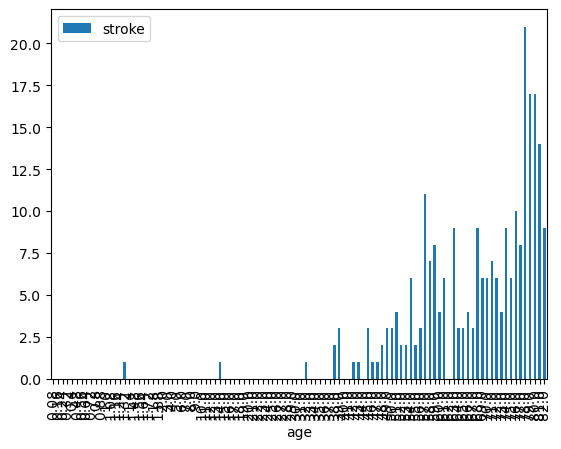

In [276]:
relevant_df_stroke = df_stroke[["age","stroke"]]
grouped_relevant_df_stroke = relevant_df_stroke\
    .groupby("age")\
    .sum()\
    .plot.bar()

We can draw the following conclusion from the plot above: the amount of strokes increase with age.